In [ ]:
# Mount Google Drive to access the dataset stored in it directly from this Colab notebook.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn nltk

In [ ]:
# Import data analysis libraries and download nltk resources for NLP.

import pandas as pd
import numpy
import matplotlib as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('all')

In [4]:
# Load the Amazon Fine Food Reviews dataset from the mounted Google Drive.
df = pd.read_csv('/content/drive/My Drive/amazon-fine-food-reviews/Reviews.csv')

In [5]:
# Limit  analysis to  first 10,000 reviews for a manageable dataset and display first few entries.
df = df.head(10000)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
print(df.shape)

(10000, 10)


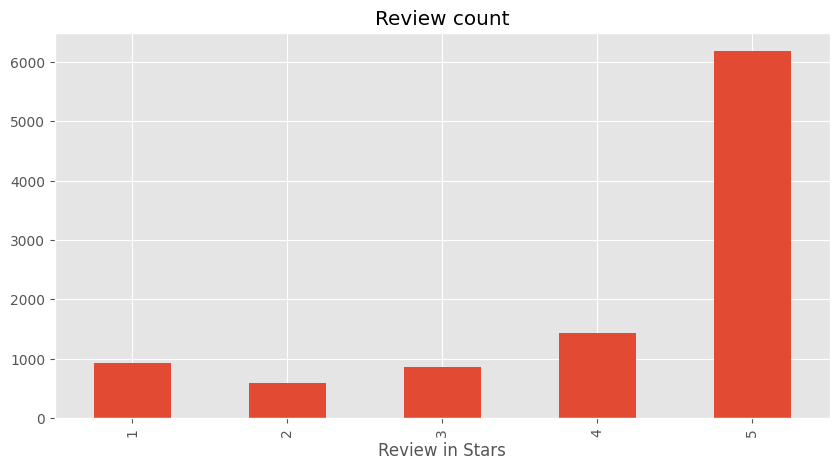

In [7]:
# Visualize the distribution of review scores to understand overall sentiment trends.
import matplotlib.pyplot as plt
ax = df['Score'].value_counts().sort_index() \
.plot(kind='bar',
      title = 'Review count',
      figsize=(10, 5))
ax.set_xlabel('Review in Stars')
plt.show()

In [8]:
# Select and display an example review text
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [9]:
# Tokenize the example review
tokens = nltk.word_tokenize(example)

In [10]:
# Perform part-of-speech tagging on the tokens
tagged = nltk.pos_tag(tokens)

In [11]:
# Apply named entity recognition for identification/classification
entity = nltk.chunk.ne_chunk(tagged)
entity.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


**VADER Sentiment Scoring**

In [12]:
# Initialize the Sentiment Intensity Analyzer for calculating sentiment scores of reviews.
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [13]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [14]:
sia.polarity_scores('I am so sad!')

{'neg': 0.648, 'neu': 0.352, 'pos': 0.0, 'compound': -0.5697}

In [15]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [16]:
#Run Polarity Score on entire dataset
results = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    results[myid] = sia.polarity_scores(text)


  0%|          | 0/10000 [00:00<?, ?it/s]

In [17]:
# Convert polarity scores dictionary to a DataFrame and merge with original reviews
vaders = pd.DataFrame(results).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


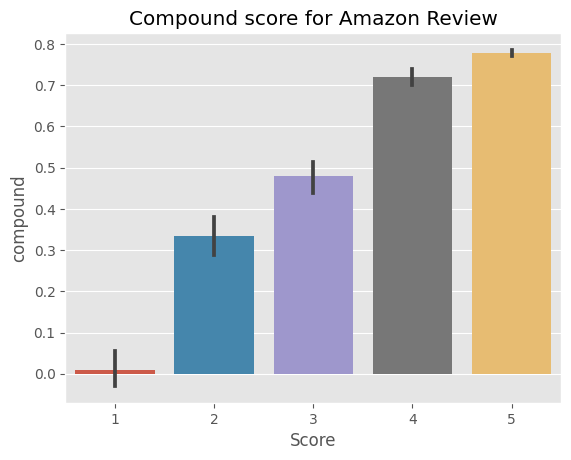

In [18]:
# Visualize  average compound score of reviews for each star rating to assess overall sentiment distribution.
import matplotlib.pyplot as plt
ax = sns.barplot(x='Score', y='compound', data=vaders)
ax.set_title('Compound score for Amazon Review')
plt.show()

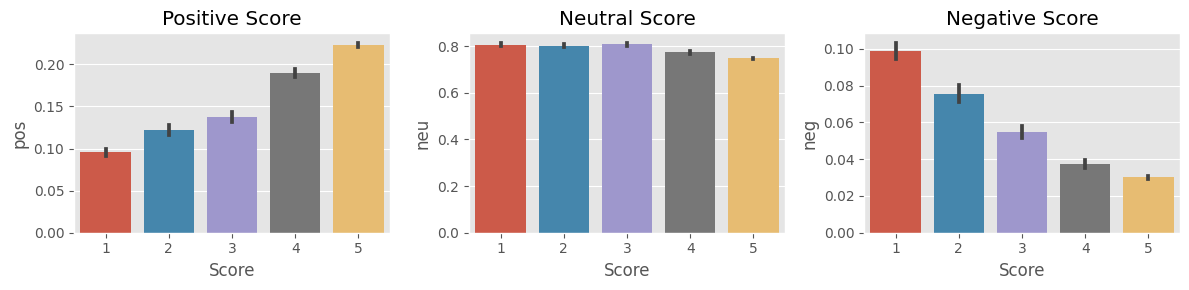

In [19]:
# Create subplots to visualize distribution of positive, neutral, and negative scores across different star ratings.
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])

axs[0].set_title('Positive Score')
axs[1].set_title('Neutral Score')
axs[2].set_title('Negative Score')
plt.tight_layout()
plt.show()

**ROBERTA PRE-TRAINED MODEL**

In [20]:
# Import  necessary libraries for utilizing transformer models.
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [21]:
# Load  ROBERTA model and tokenizer for sentiment analysis.
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [22]:
#VADER Results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [23]:
# Tokenize example text, run it through ROBERTA model and apply softmax to obtain sentiment scores.
Tokenized_input = tokenizer(example, return_tensors='pt')
output = model(**Tokenized_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687476, 'roberta_pos': 0.002957372}


In [24]:
# Define a function to calculate polarity scores using ROBERTA model for a given text.
def polarity_scores_roberta(example):
  Tokenized_input = tokenizer(example, return_tensors='pt')
  output = model(**Tokenized_input)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
  }
  return scores_dict

In [ ]:
# Process each review in the dataset, calculate sentiment scores using both VADER and ROBERTA and store combined results.
results = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  try:
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_renamed = {}
    for key, value in vader_result.items():
      vader_result_renamed[f"vader_{key}"] = value

    roberta_result = polarity_scores_roberta(text)
    both_results = {**vader_result_renamed, **roberta_result}
    results[myid] = both_results
  except:
    print(f"Error on {myid}")

In [26]:
both_results

{'vader_neg': 0.026,
 'vader_neu': 0.811,
 'vader_pos': 0.164,
 'vader_compound': 0.985,
 'roberta_neg': 0.033916708,
 'roberta_neu': 0.19402663,
 'roberta_pos': 0.77205664}

In [27]:
# Convert combined sentiment analysis results into a DataFrame and merge with original reviews.
result_df = pd.DataFrame(results).T
result_df = result_df.reset_index().rename(columns={'index': 'Id'})
result_df = result_df.merge(df, how='left')

In [28]:
result_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


**Comparing Scores Between Models**

In [29]:
result_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

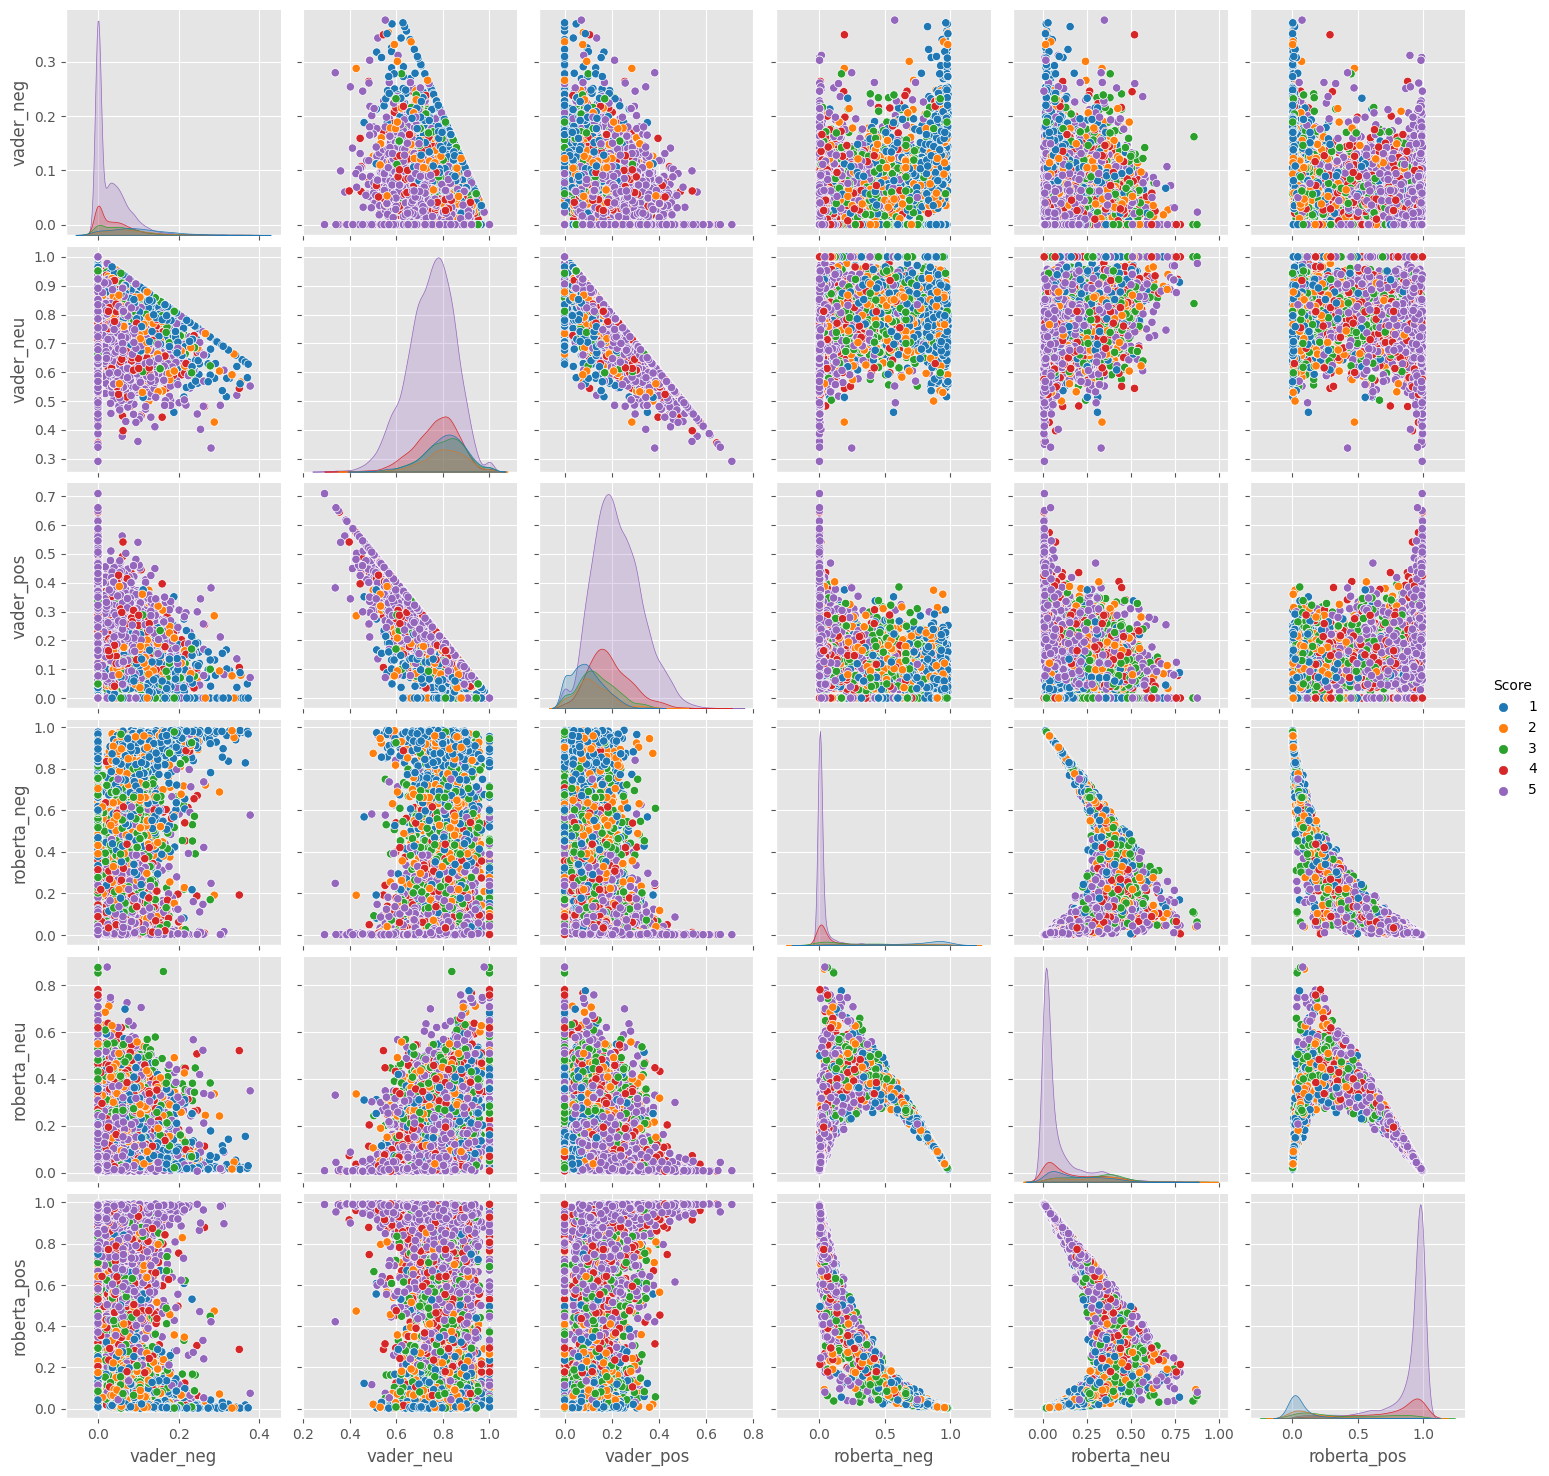

In [30]:
# Create pairplots to visualize relationships between different sentiment scores and review ratings.
sns.pairplot(data=result_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette='tab10')
plt.show()

**Review Specific Examples**

Includes analysis of potential 'outliers': High rating / negative sentiment or viceversa.

In [31]:
result_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'

In [32]:
result_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'This flavor is horrible.  There are many other flavors much better.  Hawaiian Hazelnut is great!  Breakfast in Bed is AWesome!'

In [33]:
result_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'They have a bad taste,i finish giving them away because my son started to cry everytime i tried to give these.I prefer Beech nut or Gerber.Yuck!'

In [34]:
result_df.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'My two cats must not be interested in grass, because it grew but they ignored it. Had no problems growing it.'

**Tranformers Pipeline**

In [35]:
# Initialize HuggingFace sentiment analysis pipeline for quick and easy sentiment classification.
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [36]:
sent_pipeline("I love Monday.com!!!")

[{'label': 'POSITIVE', 'score': 0.9997677206993103}]